In [1]:
set.seed(1)
options(warn = - 1)

In [2]:
make_A <- function(x, p) {
    A <- 1
    for (k in 1 : p) {
        A <- cbind(A, x ^ k)
    }
    return(A)
}

In [3]:
solve_lr <- function(x, y, p = 1) {
    A <- make_A(x, p)
    At <- t(A)
    w <- solve(At %*% A) %*% At %*% y
    MSE <- mean((A %*% w - y) ^ 2)
    return(list("w" = w, "MSE" = MSE))
}

task 14 subtask

In [164]:
task14 <- function(x1, x2, y, w) {
    # b)
    plot(x1, x2, col = "red", pch = 19)
    # What is the correlation between x1 and x2?
    # Answer: Зависимость явно есть. Точнее: x2 - линейная комбинация с x1 + маленькая ошибка.
    # c)
    x = cbind(x1, x2)
    lqs = solve_lr(x, y, p = 1)
    print(cbind(lqs$w, w))
    print(paste0("MSE both: ", lqs$MSE))
    # Can you reject the null hypothesis H0 : β1 = 0?
    # Answer: Да. Получается близко к 2.
    # How about the null hypothesis H0 : β2 = 0?
    # Answer: Нет. Бывают и отрицательные и положительные значения, близкие к 0.
    # d)
    lqs_onlyx1 = solve_lr(x1, y, p = 1)
    print(cbind(lqs_onlyx1$w, w))
    print(paste0("MSE only x1: ", lqs_onlyx1$MSE))
    # Can you reject the null hypothesis H0 : β1 = 0?
    # Answer: Да. Получается близко к 2.
    # e)
    lqs_onlyx2 = solve_lr(x2, y, p = 1)
    print(cbind(lqs_onlyx2$w, w))
    print(paste0("MSE only x2: ", lqs_onlyx1$MSE))
    # Can you reject the null hypothesis H0 : β1 = 0?
    # Answer: Да. Получается близко к 2 (точно больше 1). 
    # f)
    # Do the results obtained in (c)–(e) contradict each other? Explain your answer.
    # Answer: С первого взгляда - да. Но ведь x2 является линейной комбинацией x1, поэтому на самом
    # деле все ок.
}

              w
A  2.291684 2.0
x1 1.091632 2.0
x2 1.492365 0.3
[1] "MSE both: 0.919747176643584"
           w
A 2.283087 2
  1.854391 2
[1] "MSE only x1: 0.937765004472634"
           w
A 2.463064 2
  3.034246 2
[1] "MSE only x2: 0.937765004472634"


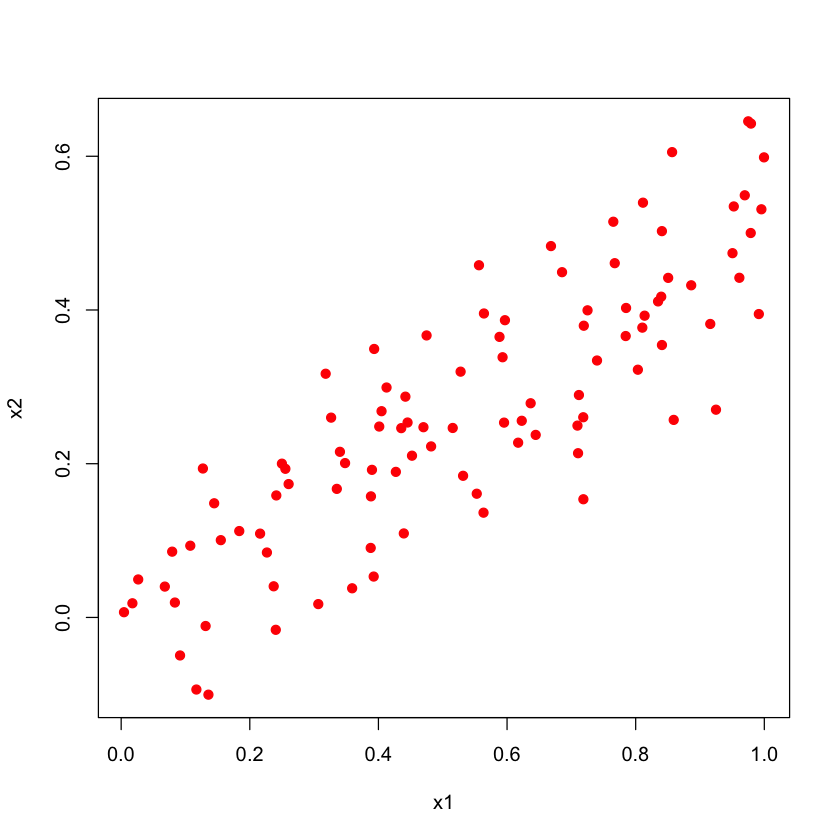

In [165]:
# a)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rnorm(100)
w = c(2, 2, 0.3)
# Write out the form of the linear model. What are the regression coefficients?
# Answer: b0 = 2, b1 = 2, b2 = 0.3, eps ~ N(0, 1)
# Real answer: b0 = 2, b1 = 2.15, eps ~ 0.03 * N(0, 1) + N(0, 1) ~ N(0, 1.0009)
task14(x1, x2, y, w)

                w
A   2.4054843 2.0
x1 -0.2704566 2.0
x2  3.8855582 0.3
[1] "MSE both: 0.934719922048569"
           w
A 2.872495 2
  1.035759 2
[1] "MSE only x1: 1.40162983659651"
           w
A 2.322296 2
  3.694613 2
[1] "MSE only x2: 1.40162983659651"


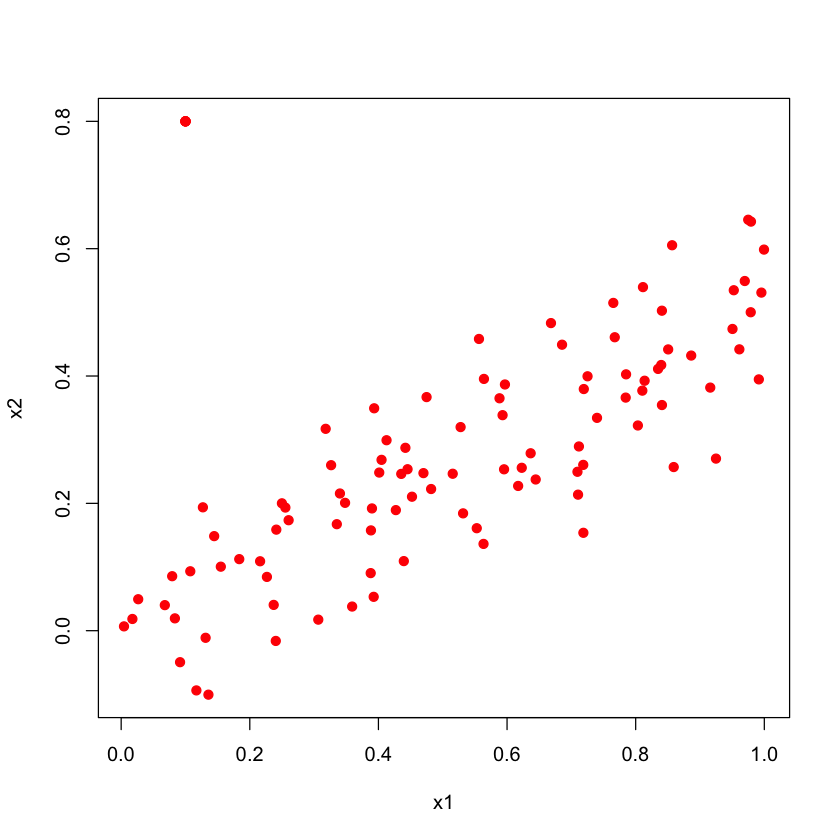

In [170]:
# g)
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)
task14(x1, x2, y, w)
# What effect does this new observation have on the each of the models?
# Answer: Коээфиценты b1 и b2 предсказываются сильно хуже. Ошибка портится не сильно, так что
# это скорее high-leverage point.